In [1]:
import numpy as np
from dlnumpy.layers import Dense
from dlnumpy.losses import MeanSquaredError
from dlnumpy.activations import ReLU, Linear
from dlnumpy.accuracy import Regression
from dlnumpy.models import Model
from dlnumpy.datagen import sine
from dlnumpy.optimizers import Adam
from dlnumpy.utils import plot_history
import matplotlib.pyplot as plt

In [2]:
X, y = sine(1000)
X_test, y_test = sine(100)

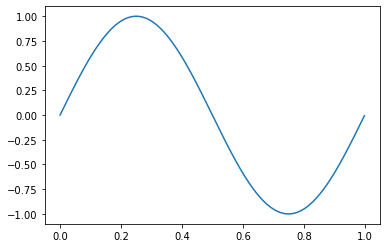

In [3]:
plt.plot(X, y)

In [4]:
model = Model()

model.add(Dense(1, 64))
model.add(ReLU())
model.add(Dense(64, 64))
model.add(ReLU())
model.add(Dense(64, 1))
model.add(Linear())

model.set(
    loss=MeanSquaredError(), 
    optimizer=Adam(lr=0.005, decay=1e-3, epsilon=1e-7, beta1=0.9, beta2=0.999), 
    accuracy_fn=Regression()
)

In [5]:
history = model.train(X, y, 1000, print_every=None)

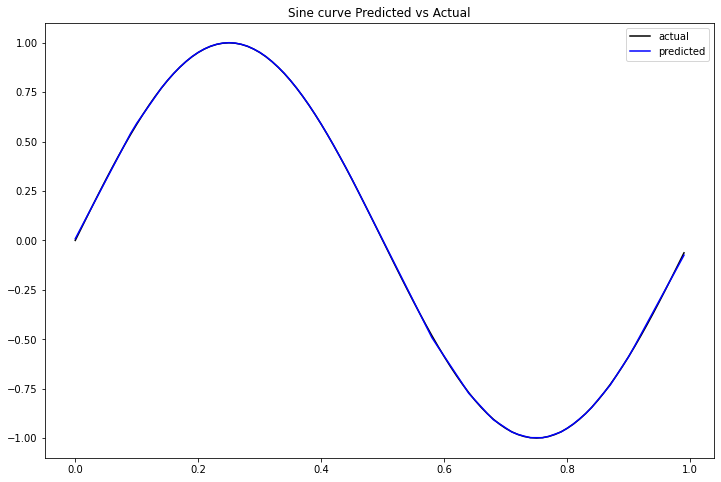

In [6]:
plt.figure(figsize=(12,8))
plt.plot(X_test, y_test, c="black", label="actual")
plt.plot(X_test, model.predict(X_test), c="blue", label="predicted")
plt.legend()
plt.title("Sine curve Predicted vs Actual")
plt.show()